In [111]:
from time import time
import logging
import sys
import sklearn
import numpy as np
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
#import os, glob, shutil
from skimage import exposure
from scipy.stats import mode
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

Automatically created module for IPython interactive environment


In [112]:
# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [113]:
def show_image_and_histogram(img):
    plt.figure(figsize=(8,3))
    plt.subplot("121")
    plt.imshow(img.reshape(50,37), cmap=plt.cm.Greys)
    plt.subplot("122")
    img_mode = mode(img).mode[0] # leaving out all the values corresponding to zeros
    plt.hist(list(filter(lambda x: x > img_mode, img.ravel())), bins=32, color='black')
    plt.xlabel('Pixel intensity')

In [114]:

# split into a training and testing set
#X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
# Print shape of dataset
print("Training: {}".format(X_train.shape))
print("Test: {}".format(X_test.shape))

Training: (966, 1850)
Test: (322, 1850)


In [115]:
X_train = X_train.reshape(len(X_train),h, w)
X_test = X_test.reshape(len(X_test), h, w)

<Figure size 432x288 with 0 Axes>

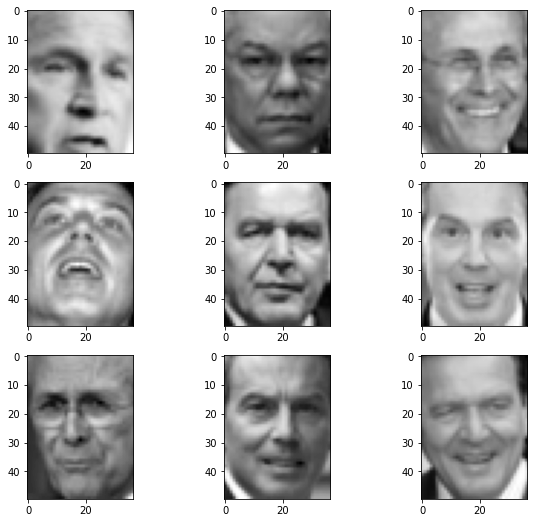

In [116]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(X_train[i])

In [117]:
for i in range(9):
  print(y_train[i])

3
1
2
6
4
6
2
6
4


In [118]:
# Checking the minimum and maximum values of x_train
print(X_train.min())
print(X_train.max())

0.0
255.0


In [119]:
# Normalize the data to 0 - 1
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

X_train = X_train/255.0
X_test = X_test/255.0
# Checking the minimum and maximum values of x_train
print(X_train.min())
print(X_train.max())

0.0
1.0


In [120]:
# Reshaping input data
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)

In [121]:
total_clusters = len(np.unique(y_test))
print("Total Clusters :", total_clusters)

# Initialize the K-Means model
kmeans = KMeans(n_clusters=total_clusters, random_state=23)

# Fitting the model to training set
kmeans.fit(X_train)

Total Clusters : 7


KMeans(n_clusters=7, random_state=23)

In [122]:
kmeans.labels_

array([2, 4, 6, 5, 6, 6, 5, 0, 2, 5, 3, 4, 0, 5, 6, 5, 5, 4, 2, 5, 2, 6,
       4, 2, 2, 2, 3, 0, 1, 5, 2, 4, 1, 4, 0, 5, 3, 0, 5, 3, 2, 1, 5, 1,
       4, 3, 1, 6, 2, 5, 5, 2, 5, 4, 4, 1, 5, 4, 4, 6, 2, 0, 0, 3, 5, 6,
       1, 4, 1, 3, 5, 1, 4, 3, 5, 4, 1, 5, 4, 2, 3, 3, 5, 1, 4, 1, 4, 4,
       6, 6, 2, 5, 3, 3, 4, 3, 6, 3, 0, 4, 4, 6, 4, 6, 2, 0, 5, 4, 5, 3,
       5, 4, 5, 4, 5, 5, 1, 5, 2, 2, 5, 4, 5, 4, 6, 1, 0, 3, 1, 5, 2, 2,
       4, 4, 1, 0, 0, 5, 2, 0, 6, 6, 2, 4, 6, 4, 1, 5, 5, 2, 2, 3, 6, 4,
       5, 2, 1, 0, 4, 1, 2, 3, 5, 2, 3, 6, 1, 4, 4, 4, 2, 5, 4, 6, 2, 5,
       1, 6, 2, 6, 1, 6, 1, 4, 4, 2, 6, 0, 2, 1, 2, 4, 6, 5, 1, 2, 2, 0,
       0, 3, 6, 5, 3, 4, 1, 6, 5, 6, 3, 5, 0, 0, 6, 2, 1, 5, 5, 5, 0, 5,
       5, 4, 2, 5, 1, 1, 5, 6, 6, 2, 0, 2, 4, 6, 2, 5, 0, 6, 5, 6, 2, 3,
       6, 5, 2, 4, 3, 6, 3, 0, 3, 2, 4, 4, 5, 5, 6, 2, 0, 0, 1, 6, 4, 1,
       5, 1, 1, 6, 2, 4, 6, 3, 5, 4, 1, 3, 3, 4, 5, 4, 5, 4, 2, 4, 6, 1,
       1, 2, 5, 1, 5, 1, 3, 5, 5, 4, 5, 4, 6, 4, 1,

In [123]:
def infer_cluster_labels(kmeans, actual_labels):

    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [124]:
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:7])
print(y_train[:7])

[3 3 3 3 3 3 3]
[3 1 2 6 4 6 2]


In [125]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set
cluster_labels = infer_cluster_labels(kmeans, y_train)
print("Predicting people's names on the test set")
t0 = time()
X_clusters = kmeans.predict(X_test)
y_pred = infer_data_labels(X_clusters, cluster_labels)
print("done in %0.3fs" % (time() - t0))
print(predicted_labels[:7])
print(y_train[:7])

Predicting people's names on the test set
done in 0.008s
[3 3 3 3 3 3 3]
[3 1 2 6 4 6 2]


In [126]:
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.32      0.20      0.24        60
  Donald Rumsfeld       0.00      0.00      0.00        27
    George W Bush       0.48      0.94      0.64       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        36

         accuracy                           0.46       322
        macro avg       0.11      0.16      0.13       322
     weighted avg       0.28      0.46      0.33       322

[[  0   4   0   9   0   0   0]
 [  0  12   0  48   0   0   0]
 [  0   9   0  18   0   0   0]
 [  0   9   0 137   0   0   0]
 [  0   1   0  24   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   3   0  33   0   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


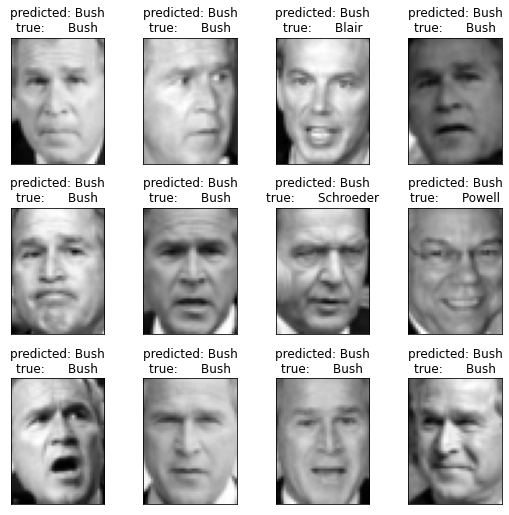

In [127]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

#eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
#plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [128]:
from sklearn.metrics import homogeneity_score

def calc_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    # Inertia
    inertia = estimator.inertia_
    print("Inertia: {}".format(inertia))
    # Homogeneity Score
    homogeneity = homogeneity_score(labels, estimator.labels_)
    print("Homogeneity score: {}".format(homogeneity))
    return inertia, homogeneity

In [ ]:
from sklearn.metrics import accuracy_score

clusters = [1, 5, 7, 10, 16, 36, 64, 144, 256, 500, 800, 966]
iner_list = []
homo_list = []
acc_list = []

for n_clusters in clusters:
    estimator = KMeans(n_clusters=n_clusters)
    estimator.fit(X_train)
    
    inertia, homo = calc_metrics(estimator, X_train, y_train)
    iner_list.append(inertia)
    homo_list.append(homo)
    
    # Determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y_train)
    prediction = infer_data_labels(estimator.labels_, cluster_labels)
    
    acc = accuracy_score(y_train, prediction)
    acc_list.append(acc)
    print('Accuracy: {}\n'.format(acc))

Number of Clusters: 1
Inertia: 38463.09765625
Homogeneity score: 0.0
Accuracy: 0.39751552795031053

Number of Clusters: 5
Inertia: 29061.3125
Homogeneity score: 0.02001542566721627
Accuracy: 0.39751552795031053

Number of Clusters: 7
Inertia: 27607.126953125
Homogeneity score: 0.05062695336102382
Accuracy: 0.41821946169772256

Number of Clusters: 10
Inertia: 26344.453125
Homogeneity score: 0.05261092037821298
Accuracy: 0.4306418219461698

Number of Clusters: 16
Inertia: 24646.99609375
Homogeneity score: 0.08567450531077882
Accuracy: 0.432712215320911

Number of Clusters: 36
Inertia: 22029.9453125
Homogeneity score: 0.15409344084297255
Accuracy: 0.45445134575569357

Number of Clusters: 64
Inertia: 20094.46875
Homogeneity score: 0.2527738691129215
Accuracy: 0.4937888198757764

Number of Clusters: 144
Inertia: 16333.18359375
Homogeneity score: 0.39554017898251165
Accuracy: 0.567287784679089

Number of Clusters: 256
Inertia: 12409.10546875
Homogeneity score: 0.5542887280382498
Accuracy: 0.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].plot(clusters, iner_list, label='inertia', marker='o')
ax[1].plot(clusters, homo_list, label='homogeneity', marker='o')
ax[1].plot(clusters, acc_list, label='accuracy', marker='^')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].grid('on')
ax[1].grid('on')
ax[0].set_title('Inertia of each clusters')
ax[1].set_title('Homogeneity and Accuracy of each clusters')
plt.show()

In [ ]:
X_test = X_test.reshape(len(X_test), -1)
X_test = X_test.astype(np.float32) / 255.

kmeans = KMeans(n_clusters=256)
kmeans.fit(X_test)

cluster_labels = infer_cluster_labels(kmeans, y_test)

test_clusters = kmeans.predict(X_test)
prediction = infer_data_labels(kmeans.predict(X_test), cluster_labels)
print('Accuracy: {}'.format(accuracy_score(y_test, prediction)))

In [ ]:
# Initialize and fit KMeans algorithm
kmeans = KMeans(n_clusters = 36)
kmeans.fit(X_test)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, h, w)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, y_test)
prediction = infer_data_labels(kmeans.predict(X_test), cluster_labels)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():        
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key), color='blue')
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
plt.show()